# Spectrum Licence Composite Dataset Construction

The Register of Radiocommunication Licences (RRL) is database containing licensing information spread across various .csv files. The information stored in the various csv files need to be merged into a single dataset using a licence number index.

### Desire Spectrum Licence Information
- Licence number
- Client number
- Frequency Ranges
- Bandwidth
- HCIS Cells

In [2]:
import pandas as pd
import numpy as np

# getRRL() -> To be implemented. Downloads RRL and verifies structure is compatible with specNav.

# -----------------
# def getSpecData ():
# -----------------

# From licence database, create dataset for spectrum licences
licence = pd.read_csv('RRL/licence.csv')


# Column tidy
licence.drop(columns=[
    'SV_ID',
    'SS_ID',
    'DATE_ISSUED',
    'DATE_OF_EFFECT',
    'DATE_OF_EXPIRY',
    'STATUS',
    'STATUS_TEXT',
    'AP_ID',
    'AP_PRJ_IDENT',
    'SHIP_NAME',
    'BSL_NO'
    ], inplace=True)

# Isolate and sort Spectrum Licence Entries
specLicence = licence.loc[licence['LICENCE_TYPE_NAME'] == 'Spectrum']
specLicence.reset_index(drop=True, inplace=True)
specLicence = specLicence.astype({'LICENCE_NO':'int64', 'CLIENT_NO' : 'int64'})
specLicence
    

,LICENCE_NO,CLIENT_NO,LICENCE_TYPE_NAME,LICENCE_CATEGORY_NAME
0,10143110,1136980,Spectrum,2 GHz Band
1,10143136,1103274,Spectrum,2 GHz Band
2,10143466,1104504,Spectrum,2 GHz Band
3,10143562,1103276,Spectrum,2 GHz Band
4,10231258,1103276,Spectrum,1800 MHz Band
...,...,...,...,...
161,9469870,1149289,Spectrum,2.5 GHz Band
162,9469871,1103275,Spectrum,2.5 GHz Band
163,9469878,1103275,Spectrum,2.5 GHz Band
164,9599659,1103275,Spectrum,2.3 GHz Band


In [3]:
# Frequency dataset
freq = pd.read_csv('RRL/auth_spectrum_freq.csv')
freq = freq.astype({'LICENCE_NO':'int64'})
freq

,LICENCE_NO,AREA_CODE,AREA_NAME,LW_FREQUENCY_START,LW_FREQUENCY_END,UP_FREQUENCY_START,UP_FREQUENCY_END
0,10006309,AP_10006309_3714,Regional South Australia,1710000000,1712500000,1.805000e+09,1.807500e+09
1,10143110,AP_10143110_3918,Brisbane,1960000000,1970000000,2.150000e+09,2.160000e+09
2,10143110,AP_10143110_3919,Adelaide,1960000000,1970000000,2.150000e+09,2.160000e+09
3,10143110,AP_10143110_3920,Perth,1960000000,1970000000,2.150000e+09,2.160000e+09
4,10143110,AP_10143110_3916,Sydney,1920000000,1935000000,2.110000e+09,2.125000e+09
...,...,...,...,...,...,...,...
1468,9599659,AP_9599659_2778,2.3 GHz Band,2302000000,2337000000,NaN,NaN
1469,9619844,AP_9619844_2798,Sydney,1740000000,1755000000,1.835000e+09,1.850000e+09
1470,9619844,AP_9619844_2800,Merge: Brisbane + Merge: Adelaide + Perth,1745000000,1755000000,1.840000e+09,1.850000e+09
1471,9619844,AP_9619844_2799,Melbourne,1740000000,1755000000,1.835000e+09,1.850000e+09


In [4]:
# HCIS codes for frequency ranges
area = pd.read_csv('RRL/auth_spectrum_area.csv')
area = area.astype({'LICENCE_NO':'int64'})
area

,LICENCE_NO,AREA_CODE,AREA_NAME,AREA_DESCRIPTION
0,10006309,AP_10006309_3714,Regional South Australia,"JX5, IW1, IW2, IW3A, IW3B, IW3C, IW3D, IW3E1, ..."
1,10143110,AP_10143110_3919,Adelaide,"IW3J, IW3K, IW3L, IW3N, IW3O, IW3P, IW6B, IW6C..."
2,10143110,AP_10143110_3917,Melbourne,"KX6G, KX6H, KX6J, KX6K, KX6L, LX1I, LX1M, LX1N..."
3,10143110,AP_10143110_3916,Sydney,"NV7E, NV7F, NV7G, NV7H, NV7I, NV7J, NV7K, NV7L..."
4,10143110,AP_10143110_3918,Brisbane,"NT9, NT5G, NT5H, NT5K, NT5L, NT5O, NT5P, NT6E,..."
...,...,...,...,...
1452,9599659,AP_9599659_2777,2.3 GHz Band,"IU, IV1, IV2, IV3"
1453,9619844,AP_9619844_2799,Melbourne,"KX3G8, KX3G9, KX3H4, KX3H5, KX3H6, KX3H7, KX3H..."
1454,9619844,AP_9619844_2798,Sydney,"MW3B5, MW3B6, MW3B8, MW3B9, MW3C, MW3D, MW3F2,..."
1455,9619844,AP_9619844_2800,Merge: Brisbane + Merge: Adelaide + Perth,"NU2C1, NU2C2, NU2C3, NU2D1, NU2D2, NU2D3, NU2D..."


In [5]:
# Merge frequency dataset on spectrum licence dataset index
SpecData = freq[freq['LICENCE_NO'].isin(specLicence['LICENCE_NO'])]
bandNames = specLicence[['LICENCE_NO','LICENCE_CATEGORY_NAME', 'CLIENT_NO']]
SpecData = pd.merge(SpecData, bandNames, how='left', on='LICENCE_NO')
areaCodes = area[['AREA_CODE', 'AREA_DESCRIPTION']]
SpecData = pd.merge(SpecData, areaCodes, how='left', on='AREA_CODE')

# Add bandwidth values
SpecData['UP_FREQUENCY_START'] = SpecData['UP_FREQUENCY_START'].fillna(0)
SpecData['UP_FREQUENCY_END'] = SpecData['UP_FREQUENCY_END'].fillna(0)
SpecData['LW_FREQUENCY_START'] = SpecData['LW_FREQUENCY_START'].fillna(0)
SpecData['LW_FREQUENCY_END'] = SpecData['LW_FREQUENCY_END'].fillna(0)
SpecData['LW_BW'] = SpecData['LW_FREQUENCY_END'] - SpecData['LW_FREQUENCY_START']
SpecData['UP_BW'] = SpecData['UP_FREQUENCY_END'] - SpecData['UP_FREQUENCY_START']
SpecData['BANDWIDTH'] = SpecData['LW_BW'] + SpecData['UP_BW']

# Re-organize dataframe
names = [
    'LICENCE_NO',
    'CLIENT_NO',
    'LW_FREQUENCY_START',
    'LW_FREQUENCY_END',
    'UP_FREQUENCY_START',
    'UP_FREQUENCY_END',
    'LW_BW',
    'UP_BW',
    'BANDWIDTH',
    'LICENCE_CATEGORY_NAME',
    'AREA_CODE',
    'AREA_NAME',
    'AREA_DESCRIPTION'
]
SpecData = SpecData.reindex(columns=names)
SpecData.reset_index(drop=True, inplace=False)
SpecData

,LICENCE_NO,CLIENT_NO,LW_FREQUENCY_START,LW_FREQUENCY_END,UP_FREQUENCY_START,UP_FREQUENCY_END,LW_BW,UP_BW,BANDWIDTH,LICENCE_CATEGORY_NAME,AREA_CODE,AREA_NAME,AREA_DESCRIPTION
0,10143110,1136980,1960000000,1970000000,2.150000e+09,2.160000e+09,10000000,10000000.0,20000000.0,2 GHz Band,AP_10143110_3918,Brisbane,"NT9, NT5G, NT5H, NT5K, NT5L, NT5O, NT5P, NT6E,..."
1,10143110,1136980,1960000000,1970000000,2.150000e+09,2.160000e+09,10000000,10000000.0,20000000.0,2 GHz Band,AP_10143110_3919,Adelaide,"IW3J, IW3K, IW3L, IW3N, IW3O, IW3P, IW6B, IW6C..."
2,10143110,1136980,1960000000,1970000000,2.150000e+09,2.160000e+09,10000000,10000000.0,20000000.0,2 GHz Band,AP_10143110_3920,Perth,"BV1I, BV1J, BV1K, BV1L, BV1M, BV1N, BV1O, BV1P..."
3,10143110,1136980,1920000000,1935000000,2.110000e+09,2.125000e+09,15000000,15000000.0,30000000.0,2 GHz Band,AP_10143110_3916,Sydney,"NV7E, NV7F, NV7G, NV7H, NV7I, NV7J, NV7K, NV7L..."
4,10143110,1136980,1920000000,1935000000,2.110000e+09,2.125000e+09,15000000,15000000.0,30000000.0,2 GHz Band,AP_10143110_3917,Melbourne,"KX6G, KX6H, KX6J, KX6K, KX6L, LX1I, LX1M, LX1N..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,9599659,1103275,2365000000,2400000000,0.000000e+00,0.000000e+00,35000000,0.0,35000000.0,2.3 GHz Band,AP_9599659_2777,2.3 GHz Band,"IU, IV1, IV2, IV3"
1467,9599659,1103275,2302000000,2337000000,0.000000e+00,0.000000e+00,35000000,0.0,35000000.0,2.3 GHz Band,AP_9599659_2778,2.3 GHz Band,"GR, GS, HR, FR3, FR6, FR9, FS3, FS6, FS9, FT3,..."
1468,9619844,1136980,1740000000,1755000000,1.835000e+09,1.850000e+09,15000000,15000000.0,30000000.0,1800 MHz Band,AP_9619844_2798,Sydney,"MW3B5, MW3B6, MW3B8, MW3B9, MW3C, MW3D, MW3F2,..."
1469,9619844,1136980,1745000000,1755000000,1.840000e+09,1.850000e+09,10000000,10000000.0,20000000.0,1800 MHz Band,AP_9619844_2800,Merge: Brisbane + Merge: Adelaide + Perth,"NU2C1, NU2C2, NU2C3, NU2D1, NU2D2, NU2D3, NU2D..."


### Issue: Data Entries Mismatch
> The number of entries in the freq dataset do not match the number of entries in the SpecFreq dataset

There may be a frequency range entry for a licence number that does not exist in the spectrum licences dataset.

In [6]:
# ---------------------------------------------
# -------- INVESTIGATION OF MISMATCH ----------
# ---------------------------------------------

# get all licence nos in freq and licence nos in specLicences, check for differences
set1 = (set(specLicence['LICENCE_NO']))
set2 = set(freq['LICENCE_NO'])

# Present in Freq but not in specLicence
print(set2 - set1)

{10006309, 9998087}


# Spectrum Licence Dataset Querying
Using the composite dataset, generate a sorted dataset containing only the licences for a given list of client numbers. For improved accessibility, sort licences by client number (if multiple client numbers), HCIS ID's and frequency ranges. Implement grouping of entries if possible.

In [7]:
from http import client
pd.options.mode.chained_assignment = None


def clientSearch(SpecData, clientIDs):
    
    # Parse inputs
    clientIDs = pd.Series(list(clientIDs.split(',')))
    clientIDs = clientIDs.astype('int64')
    
    # Input verification

    # Search spectrum dataset
    clientData = SpecData[SpecData['CLIENT_NO'].isin(clientIDs)]
    clientData.reset_index(drop=True, inplace=True)
    
    # No spectrum licences for client(s) number found (GUI)
    
    # Generate client holding summary
    clientSummary = pd.DataFrame(clientIDs, columns=['CLIENT_NO'])
    holdingBandwidth = []

    for clientNum in list(clientIDs):
        
        holding = clientData[clientData['CLIENT_NO'] == clientNum]
        holdingBandwidth.append(holding['BANDWIDTH'].sum())

    clientSummary['TOTAL_BANDWIDTH_MHz'] = pd.Series(holdingBandwidth)/1000000

    # Fetch client name
    clients = pd.read_csv("RRL/client.csv")
    clients = clients[clients['CLIENT_NO'].isin(clientIDs)].reset_index()
    clientSummary = clientSummary.assign(LICENCEE=clients['LICENCEE'])

    return clientData, clientSummary

clientIDs = "1104504,20009217"

clientData, clientSummary = clientSearch (SpecData, clientIDs)

clientData



,LICENCE_NO,CLIENT_NO,LW_FREQUENCY_START,LW_FREQUENCY_END,UP_FREQUENCY_START,UP_FREQUENCY_END,LW_BW,UP_BW,BANDWIDTH,LICENCE_CATEGORY_NAME,AREA_CODE,AREA_NAME,AREA_DESCRIPTION
0,10143466,1104504,1920000000,1930000000,2.110000e+09,2.120000e+09,10000000,10000000.0,20000000.0,2 GHz Band,AP_10143466_4113,Adelaide,"IW3J, IW3K, IW3L, IW3N, IW3O, IW3P, IW6B, IW6C..."
1,10143466,1104504,1935000000,1940000000,2.125000e+09,2.130000e+09,5000000,5000000.0,10000000.0,2 GHz Band,AP_10143466_4113,Adelaide,"IW3J, IW3K, IW3L, IW3N, IW3O, IW3P, IW6B, IW6C..."
2,10143466,1104504,1920000000,1930000000,2.110000e+09,2.120000e+09,10000000,10000000.0,20000000.0,2 GHz Band,AP_10143466_4112,Brisbane,"NT9, NT5G, NT5H, NT5K, NT5L, NT5O, NT5P, NT6E,..."
3,10143466,1104504,1935000000,1940000000,2.125000e+09,2.130000e+09,5000000,5000000.0,10000000.0,2 GHz Band,AP_10143466_4112,Brisbane,"NT9, NT5G, NT5H, NT5K, NT5L, NT5O, NT5P, NT6E,..."
4,10143466,1104504,1960000000,1970000000,2.150000e+09,2.160000e+09,10000000,10000000.0,20000000.0,2 GHz Band,AP_10143466_4111,Melbourne,"KX3J, KX3K, KX3L, KX3N, KX3O, KX3P, KX6B, KX6C..."
5,10143466,1104504,1935000000,1940000000,2.125000e+09,2.130000e+09,5000000,5000000.0,10000000.0,2 GHz Band,AP_10143466_4111,Melbourne,"KX3J, KX3K, KX3L, KX3N, KX3O, KX3P, KX6B, KX6C..."
6,10143466,1104504,1935000000,1940000000,2.125000e+09,2.130000e+09,5000000,5000000.0,10000000.0,2 GHz Band,AP_10143466_4114,Perth,"BV1I, BV1J, BV1K, BV1L, BV1M, BV1N, BV1O, BV1P..."
7,10143466,1104504,1965000000,1975000000,2.155000e+09,2.165000e+09,10000000,10000000.0,20000000.0,2 GHz Band,AP_10143466_4124,Regional Western Australia,"AU2, AU3, AU6, AU9, AV9, AW3, BU1, BU2, BU4, B..."
8,10143466,1104504,1965000000,1975000000,2.155000e+09,2.165000e+09,10000000,10000000.0,20000000.0,2 GHz Band,AP_10143466_4119,Regional South East Australia,"NV5K3, NV5L1, NV5L2, NV5L3, NV7A1, LZ2J, LZ2K,..."
9,10143466,1104504,1960000000,1970000000,2.150000e+09,2.160000e+09,10000000,10000000.0,20000000.0,2 GHz Band,AP_10143466_4118,Sydney,"NV4L8, NV4L9, NV4M2, NV4M3, NV4M5, NV4M6, NV4M..."


# Creating Shapefiles of Spectrum Holdings

Using the ACMA Australian Spectrum Map Grid data:

- Create a geodataframe of all HCIS cells
- Using HCIS list, create client geodataframe
- export client geodataframe as shapefile

In [8]:
import geopandas as gpd

def buildASMG():
    """Build and save geodataframe of ASMG for EVERY HCIS ID as csv file.

    """
    
    l1 = gpd.read_file("ASMG/ASMG_2012_GDA94_L1.shp")
    l1.rename(columns={'HCI_Level1':'HCIS_ID'}, inplace=True)
    l1.drop(columns=['HCI_Level2', 'HCI_Level3', 'HCI_Level4'])

    l2 = gpd.read_file("ASMG/ASMG_2012_GDA94_L2.shp")
    l2.rename(columns={'HCI_Level2':'HCIS_ID'}, inplace=True)
    l2.drop(columns=['HCI_Level3', 'HCI_Level4'])

    l3 = gpd.read_file("ASMG/ASMG_2012_GDA94_L3.shp")
    l3.rename(columns={'HCI_Level3':'HCIS_ID'}, inplace=True)
    l3.drop(columns=['HCI_Level4'])

    l4 = gpd.read_file("ASMG/ASMG_2012_GDA94_L4.shp")
    l4.rename(columns={'HCI_Level4':'HCIS_ID'}, inplace=True)

    asmg = pd.concat([l1, l2, l3, l4])
    asmg.to_file('ASMG/asmg')
    
    return

asmg = gpd.read_file('ASMG/asmg.shp')

# Creating Polygons from HCIS cell descriptions

In [12]:
hcis = []

for cells in clientData['AREA_DESCRIPTION']:
    cells = pd.Series(list(cells.split(', ')))
    clientArea = asmg[asmg['HCIS_ID'].isin(cells)]
    clientArea.reset_index(inplace=True)
    poly = clientArea['geometry']
    hcis.append(poly.unary_union)

hcis = gpd.GeoSeries(hcis, crs='EPSG:4283')
clientData['geometry'] = hcis
shp = gpd.GeoDataFrame(clientData)

# Generating Shapefile Preview

Apply basemap to search results.

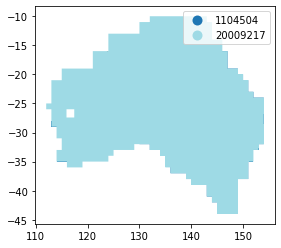

In [ ]:
import contextily as cx
from matplotlib import pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Australia'].plot(color='white', edgecolor='black')
fig = shp.plot(ax=ax, column='CLIENT_NO', cmap='tab20', categorical=True, legend=True)

# Creating Holding Summary Shapefile

In [14]:
def getUniqueAreas(gdf):
    """Given a geodataframe, return a list of unique HCIS descriptions

    Args:
        gdf (GeoDataFrame): Client data geodataframe

    Returns:
        uniqueAreas: List of HCIS descriptions (list)
    """
    uniqueAreas = gdf['AREA_DESCRIPTION'].tolist()
    return uniqueAreas

gdf = clientData

areaStrings = gdf['AREA_DESCRIPTION'].tolist()
uniqueAreas = []

for string in areaStrings:
    uniqueAreas.append(list(string.split(', ')))

for hcis1 in uniqueAreas:
    for hcis2 in uniqueAreas:
        

[['IW3J',
  'IW3K',
  'IW3L',
  'IW3N',
  'IW3O',
  'IW3P',
  'IW6B',
  'IW6C',
  'IW6D',
  'IW6F',
  'IW6G',
  'IW6H',
  'IW3E5',
  'IW3E6',
  'IW3E8',
  'IW3E9',
  'IW3F4',
  'IW3F5',
  'IW3F6',
  'IW3F7',
  'IW3F8',
  'IW3F9',
  'IW3G4',
  'IW3G5',
  'IW3G6',
  'IW3G7',
  'IW3G8',
  'IW3G9',
  'IW3H4',
  'IW3H5',
  'IW3H6',
  'IW3H7',
  'IW3H8',
  'IW3H9',
  'IW3I2',
  'IW3I3',
  'IW3I5',
  'IW3I6',
  'IW3I8',
  'IW3I9',
  'IW3M2',
  'IW3M3',
  'IW3M5',
  'IW3M6',
  'IW3M8',
  'IW3M9',
  'IW6A2',
  'IW6A3',
  'IW6A5',
  'IW6A6',
  'IW6A8',
  'IW6A9',
  'IW6E2',
  'IW6E3',
  'IW6E5',
  'IW6E6',
  'IW6E8',
  'IW6E9',
  'JW1E4',
  'JW1E7',
  'JW1I1',
  'JW1I4',
  'JW1I7',
  'JW1M1',
  'JW1M4'],
 ['IW3J',
  'IW3K',
  'IW3L',
  'IW3N',
  'IW3O',
  'IW3P',
  'IW6B',
  'IW6C',
  'IW6D',
  'IW6F',
  'IW6G',
  'IW6H',
  'IW3E5',
  'IW3E6',
  'IW3E8',
  'IW3E9',
  'IW3F4',
  'IW3F5',
  'IW3F6',
  'IW3F7',
  'IW3F8',
  'IW3F9',
  'IW3G4',
  'IW3G5',
  'IW3G6',
  'IW3G7',
  'IW3G8',
  'IW3G9',
